# Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


import pickle

from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.metrics import accuracy_score


# Show plots inline
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Data Collection and Acquisition

In [3]:
# Code task 1 - Gather data
# Load CSV from a local file

df = pd.read_csv('df_features.csv')
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


In [4]:
# Code task 4
# Check the format of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


# Handling Non-Numeric Features (Categorical variables)

Encoding all non-numeric features such as "Product Name", "Brand", "Category", "Color", "Size" into numeric values

In [5]:
# Code task 17
#Create dummy or indicator features for categorical variable "Product Name", "Brand", "Category", "Color", "Size"

#categorical data
categorical_cols = ["Product Name", "Brand", "Category", "Color", "Size"] 

#import pandas as pd
df_new = pd.get_dummies(df, columns = categorical_cols, dtype=int)
df_new

,User ID,Product ID,Price,Rating,Product Name_Dress,Product Name_Jeans,Product Name_Shoes,Product Name_Sweater,Product Name_T-shirt,Brand_Adidas,...,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_L,Size_M,Size_S,Size_XL
0,19,1,40,1.043159,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,97,2,82,4.026416,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,25,3,44,3.337938,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,57,4,23,1.049523,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,79,5,79,4.302773,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20,996,55,1.620081,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
996,42,997,13,1.544464,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
997,9,998,47,3.961913,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
998,8,999,68,3.089722,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


Here, we have created a feature matrix where:

User ID, Product ID and Price are identifiers.
Rating is the target variable.
Rest all are the features.

In [6]:
# Code task 18
# Check the shape of the new dataframe (including newly encoded columns) in the DataFrame

print(df_new.shape)

(1000, 27)


In [7]:
# Code task 19
# Check the format of all columns (including newly encoded columns) in the DataFrame

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   1000 non-null   int64  
 1   Product ID                1000 non-null   int64  
 2   Price                     1000 non-null   int64  
 3   Rating                    1000 non-null   float64
 4   Product Name_Dress        1000 non-null   int64  
 5   Product Name_Jeans        1000 non-null   int64  
 6   Product Name_Shoes        1000 non-null   int64  
 7   Product Name_Sweater      1000 non-null   int64  
 8   Product Name_T-shirt      1000 non-null   int64  
 9   Brand_Adidas              1000 non-null   int64  
 10  Brand_Gucci               1000 non-null   int64  
 11  Brand_H&M                 1000 non-null   int64  
 12  Brand_Nike                1000 non-null   int64  
 13  Brand_Zara                1000 non-null   int64  
 14  Category_

All columns are now numeric.

In [8]:
# Code task 20
# Check the description of all the numerical columns (including newly encoded columns) in the DataFrame

df_new.describe()

,User ID,Product ID,Price,Rating,Product Name_Dress,Product Name_Jeans,Product Name_Shoes,Product Name_Sweater,Product Name_T-shirt,Brand_Adidas,...,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_L,Size_M,Size_S,Size_XL
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135,0.176000,0.231000,0.222000,0.170000,0.201000,0.198000,...,0.154000,0.172000,0.156000,0.15000,0.19300,0.175000,0.251000,0.246000,0.24900,0.254000
std,28.78131,288.819436,26.291748,1.153185,0.381011,0.421683,0.415799,0.375821,0.400949,0.398692,...,0.361129,0.377569,0.363037,0.35725,0.39485,0.380157,0.433805,0.430894,0.43265,0.435515
min,1.00000,1.000000,10.000000,1.000967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,26.00000,250.750000,33.000000,1.992786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,50.00000,500.500000,57.000000,2.984003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,75.00000,750.250000,78.250000,3.985084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000,0.00000,1.000000
max,100.00000,1000.000000,100.000000,4.987964,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000


# Visualizing High Dimensional Data

# Scale the data

We only want numeric data here and use scale() to scale the data which returns an ndarray to visualise scaled data. 
Now we construct a dataframe from the ndarray here and reintroduce the column names.

In [9]:
# Code task 25

#Create a new dataframe, `df_train_scale` from `df_new whilst setting the index to 'Product ID'
df_train_scale = df_new.set_index("Product ID")
#Save the product labels (using the index attribute of `df_train_scale`) into the variable 'df_train_index'
df_train_index = df_train_scale.index
#Save the column names (using the `columns` attribute)` into the variable 'df_train_columns'
df_train_columns = df_train_scale.columns
df_train_scale.head()

,User ID,Price,Rating,Product Name_Dress,Product Name_Jeans,Product Name_Shoes,Product Name_Sweater,Product Name_T-shirt,Brand_Adidas,Brand_Gucci,...,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_L,Size_M,Size_S,Size_XL
Product ID,,,,,,,,,,,,,,,,,,,,,
1,19,40,1.043159,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,97,82,4.026416,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,25,44,3.337938,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,57,23,1.049523,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,79,79,4.302773,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [10]:
# Code task 26

df_train_scale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   1000 non-null   int64  
 1   Price                     1000 non-null   int64  
 2   Rating                    1000 non-null   float64
 3   Product Name_Dress        1000 non-null   int64  
 4   Product Name_Jeans        1000 non-null   int64  
 5   Product Name_Shoes        1000 non-null   int64  
 6   Product Name_Sweater      1000 non-null   int64  
 7   Product Name_T-shirt      1000 non-null   int64  
 8   Brand_Adidas              1000 non-null   int64  
 9   Brand_Gucci               1000 non-null   int64  
 10  Brand_H&M                 1000 non-null   int64  
 11  Brand_Nike                1000 non-null   int64  
 12  Brand_Zara                1000 non-null   int64  
 13  Category_Kids' Fashion    1000 non-null   int64  
 14  Category_Men'

In [11]:
# Code task 27

df_train_scale = scale(df_train_scale)

In [12]:
#Code task 28
#Create a new dataframe from `df_merged_scale` using the column names we saved in `df_merged_columns`

df_train_scaled_df = pd.DataFrame(df_train_scale, columns= df_train_columns)
df_train_scaled_df.head()

,User ID,Price,Rating,Product Name_Dress,Product Name_Jeans,Product Name_Shoes,Product Name_Sweater,Product Name_T-shirt,Brand_Adidas,Brand_Gucci,...,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_L,Size_M,Size_S,Size_XL
0,-1.092192,-0.600679,-1.691793,2.163751,-0.548079,-0.534179,-0.45257,-0.501562,2.012587,-0.485895,...,2.343823,-0.455773,-0.429923,-0.420084,-0.489037,-0.460566,-0.578890,-0.571192,-0.575811,1.713770
1,1.619256,0.997580,0.896472,-0.462160,-0.548079,1.872032,-0.45257,-0.501562,-0.496873,-0.485895,...,2.343823,-0.455773,-0.429923,-0.420084,-0.489037,-0.460566,1.727444,-0.571192,-0.575811,-0.583509
2,-0.883619,-0.448464,0.299150,2.163751,-0.548079,-0.534179,-0.45257,-0.501562,2.012587,-0.485895,...,-0.426653,-0.455773,-0.429923,-0.420084,-0.489037,2.171241,-0.578890,-0.571192,-0.575811,1.713770
3,0.228770,-1.247593,-1.686272,-0.462160,-0.548079,1.872032,-0.45257,-0.501562,-0.496873,-0.485895,...,-0.426653,-0.455773,-0.429923,-0.420084,2.044834,-0.460566,-0.578890,-0.571192,1.736682,-0.583509
4,0.993537,0.883418,1.136238,-0.462160,-0.548079,-0.534179,-0.45257,1.993771,2.012587,-0.485895,...,2.343823,-0.455773,-0.429923,-0.420084,-0.489037,-0.460566,-0.578890,1.750726,-0.575811,-0.583509


# Verifying the scaling

First of all, I check the mean of the scaled features using panda's mean() DataFrame method.

In [13]:
#Code task 29
#Call `df_merged_scaled_df`'s `mean()` method

df_train_scaled_df.mean()

User ID                     1.172396e-16
Price                       1.456613e-16
Rating                      3.197442e-16
Product Name_Dress          3.197442e-17
Product Name_Jeans          7.105427e-18
Product Name_Shoes         -1.598721e-17
Product Name_Sweater       -2.309264e-17
Product Name_T-shirt       -1.101341e-16
Brand_Adidas               -4.618528e-17
Brand_Gucci                 3.552714e-17
Brand_H&M                  -3.197442e-17
Brand_Nike                  4.352074e-17
Brand_Zara                 -1.092459e-16
Category_Kids' Fashion     -4.618528e-17
Category_Men's Fashion     -4.618528e-17
Category_Women's Fashion   -5.684342e-17
Color_Black                -3.375078e-17
Color_Blue                  4.973799e-17
Color_Green                -5.329071e-17
Color_Red                   1.065814e-17
Color_White                -1.216804e-16
Color_Yellow               -7.105427e-18
Size_L                     -4.263256e-17
Size_M                      1.598721e-17
Size_S          

Perform a similar check for the standard deviation using pandas's std() DataFrame method.

In [14]:
#Code task 30
#Call `df_merged_scaled_df`'s `std()` method

df_train_scaled_df.std()

User ID                     1.0005
Price                       1.0005
Rating                      1.0005
Product Name_Dress          1.0005
Product Name_Jeans          1.0005
Product Name_Shoes          1.0005
Product Name_Sweater        1.0005
Product Name_T-shirt        1.0005
Brand_Adidas                1.0005
Brand_Gucci                 1.0005
Brand_H&M                   1.0005
Brand_Nike                  1.0005
Brand_Zara                  1.0005
Category_Kids' Fashion      1.0005
Category_Men's Fashion      1.0005
Category_Women's Fashion    1.0005
Color_Black                 1.0005
Color_Blue                  1.0005
Color_Green                 1.0005
Color_Red                   1.0005
Color_White                 1.0005
Color_Yellow                1.0005
Size_L                      1.0005
Size_M                      1.0005
Size_S                      1.0005
Size_XL                     1.0005
dtype: float64

Since scale() uses the biased estimator for standard deviation (ddof=0), I calculates the standard deviation of the sample using std() method and defaults to using ddof=1, that is it's normalized by N-1.

In [15]:
#Code task 31
#Repeat the previous call to `std()` but pass in ddof=0 

df_train_df = df_train_scaled_df.std(ddof=0)
df_train_df

User ID                     1.0
Price                       1.0
Rating                      1.0
Product Name_Dress          1.0
Product Name_Jeans          1.0
Product Name_Shoes          1.0
Product Name_Sweater        1.0
Product Name_T-shirt        1.0
Brand_Adidas                1.0
Brand_Gucci                 1.0
Brand_H&M                   1.0
Brand_Nike                  1.0
Brand_Zara                  1.0
Category_Kids' Fashion      1.0
Category_Men's Fashion      1.0
Category_Women's Fashion    1.0
Color_Black                 1.0
Color_Blue                  1.0
Color_Green                 1.0
Color_Red                   1.0
Color_White                 1.0
Color_Yellow                1.0
Size_L                      1.0
Size_M                      1.0
Size_S                      1.0
Size_XL                     1.0
dtype: float64

In [16]:
#Check if there are still nan values
df_train_df.isnull().sum(axis = 0)

0

# Train/Test Split

Partition sizes with a 70/30 train/test split

In [17]:
len(df_new) * .7, len(df_new) * .3

(700.0, 300.0)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_new.drop(columns='Rating'), 
                                                    df_new.Rating, test_size=0.3, 
                                                    random_state=47)

In [19]:
X_train.shape, X_test.shape

((700, 26), (300, 26))

In [20]:
y_train.shape, y_test.shape

((700,), (300,))

In [21]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

User ID                     int64
Product ID                  int64
Price                       int64
Product Name_Dress          int64
Product Name_Jeans          int64
Product Name_Shoes          int64
Product Name_Sweater        int64
Product Name_T-shirt        int64
Brand_Adidas                int64
Brand_Gucci                 int64
Brand_H&M                   int64
Brand_Nike                  int64
Brand_Zara                  int64
Category_Kids' Fashion      int64
Category_Men's Fashion      int64
Category_Women's Fashion    int64
Color_Black                 int64
Color_Blue                  int64
Color_Green                 int64
Color_Red                   int64
Color_White                 int64
Color_Yellow                int64
Size_L                      int64
Size_M                      int64
Size_S                      int64
Size_XL                     int64
dtype: object

In [22]:
#Repeat this check for the test split in `X_test`
X_test.dtypes

User ID                     int64
Product ID                  int64
Price                       int64
Product Name_Dress          int64
Product Name_Jeans          int64
Product Name_Shoes          int64
Product Name_Sweater        int64
Product Name_T-shirt        int64
Brand_Adidas                int64
Brand_Gucci                 int64
Brand_H&M                   int64
Brand_Nike                  int64
Brand_Zara                  int64
Category_Kids' Fashion      int64
Category_Men's Fashion      int64
Category_Women's Fashion    int64
Color_Black                 int64
Color_Blue                  int64
Color_Green                 int64
Color_Red                   int64
Color_White                 int64
Color_Yellow                int64
Size_L                      int64
Size_M                      int64
Size_S                      int64
Size_XL                     int64
dtype: object

We have only numeric features in our X now!

# Method 1 - Random Forest Model

# Define the pipeline

In [23]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [24]:
X_train.head()

,User ID,Product ID,Price,Product Name_Dress,Product Name_Jeans,Product Name_Shoes,Product Name_Sweater,Product Name_T-shirt,Brand_Adidas,Brand_Gucci,...,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_L,Size_M,Size_S,Size_XL
128,70,129,85,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
492,57,493,88,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
303,7,304,85,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
120,95,121,96,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
455,93,456,14,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


# Fit and assess performance using cross-validation

In [25]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [26]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([-0.12038852, -0.14146272, -0.11731329, -0.05205469, -0.13317129])

In [27]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(-0.11287810169424568, 0.0316368744846752)

# Hyperparameter search using GridSearchCV

In [28]:
#n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
n_est = [10,50,100]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10, 50, 100],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [29]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=3, n_jobs=-1)

In [30]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 50, 100],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [31]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 100,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [32]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([-0.12038852, -0.14146272, -0.11731329, -0.05205469, -0.13317129])

In [33]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(-0.11287810169424568, 0.0316368744846752)

No improvement has been seen from the default CV results.

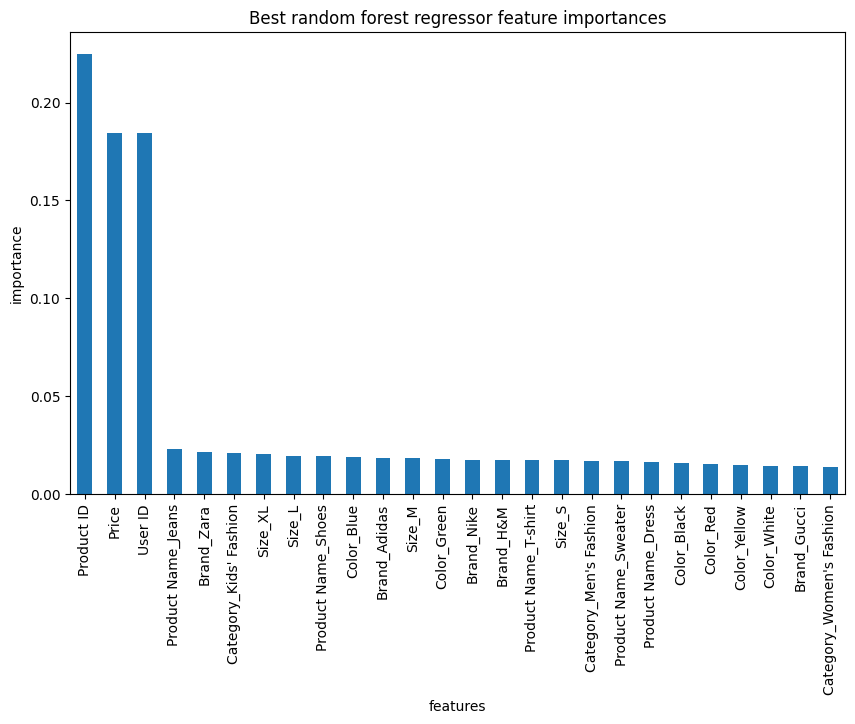

In [34]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 6))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

Product ID                0.224836
Price                     0.184685
User ID                   0.184356
Product Name_Jeans        0.022933
Brand_Zara                0.021372
Category_Kids' Fashion    0.020940
Size_XL                   0.020280
Size_L                    0.019384
Product Name_Shoes        0.019228
Color_Blue                0.019108
dtype: float64


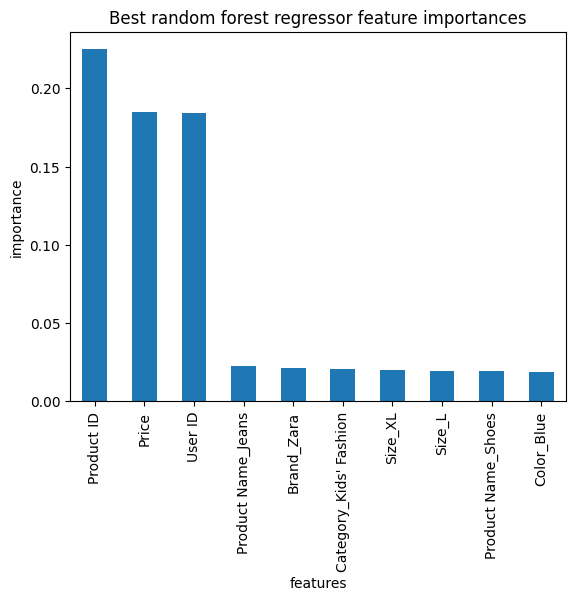

In [35]:
# Get the top N important features (e.g., top 3)
top_n = 10
top_features = rf_feat_imps.head(top_n)

# Print top N features
print(top_features)

top_features.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

A bar plot of feature importances above helps us identify following features contribute most to a model’s predictions:
Product ID, Price, User ID, Product name Jeans and Brand Zara are top features.

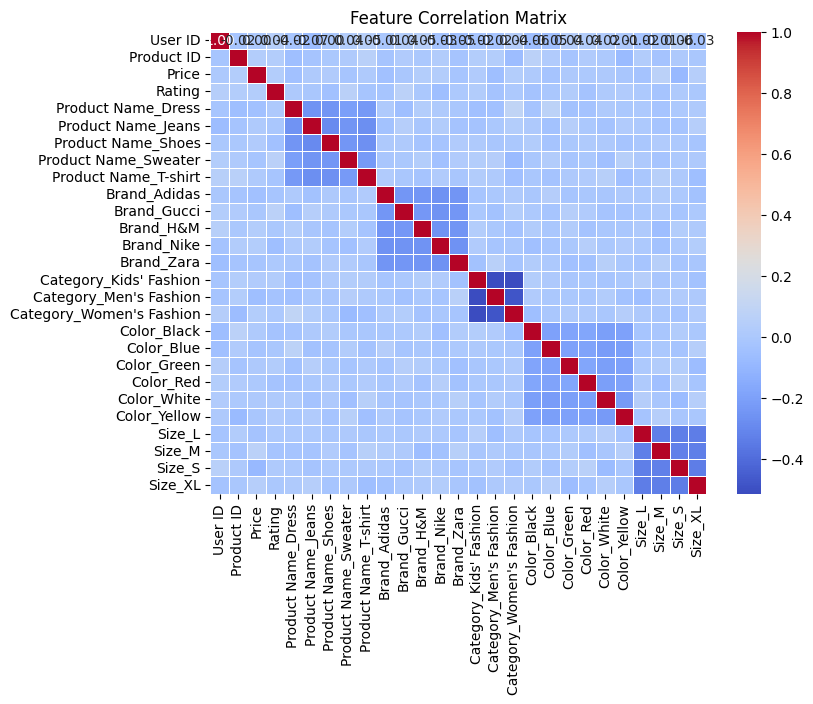

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson correlation matrix
corr_matrix = df_new.corr(method='pearson')

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [36]:
# Predict on the test set
y_pred = rf_grid_cv.predict(X_test)

# Display predicted ratings
print(y_pred)

[2.87228326 3.02896532 3.21872972 2.90934419 2.49425684 2.91436309
 3.40402139 2.93289527 2.92828034 3.06022958 3.67300086 2.94229626
 3.08235193 2.49394131 2.88118068 3.11754295 3.03087991 3.07644705
 2.49158713 3.17947138 3.22499217 3.08780773 2.38524717 2.78069914
 3.09642674 2.90652216 2.96869296 3.42854411 3.24797941 2.90974262
 2.7775862  3.29868155 2.90368323 3.27290997 2.98788225 3.19080333
 3.09988949 3.0518562  2.90884556 2.74477825 2.72849307 3.1830405
 2.91383761 3.13811293 2.90387489 2.63419928 2.81935086 3.0516327
 3.40636699 2.59408576 3.54484762 2.52891041 2.64637461 2.7541108
 3.07962831 2.8485616  2.95437069 3.06146684 2.90778195 3.57981385
 3.07717792 3.48514444 2.32184164 2.99006518 2.89323793 3.03234323
 2.9754332  3.15541322 3.12549407 3.39854051 2.88874392 3.13960894
 3.0851938  3.21368107 2.7773402  2.95438741 3.52202725 2.8389454
 3.03209793 2.72212771 2.80036051 3.24522512 2.93843842 2.95044287
 3.20394043 3.05434731 3.0231816  2.41455517 3.41963245 3.11721563

In [37]:
# Train a Random Forest Regressor model
#rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=2)
#rf_model.fit(X_train, y_train)

# Predict ratings on the test set
#y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


Mean Squared Error: 1.37
Mean Absolute Error: 0.99


In [38]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: -0.06


This is an issue, R square should not be negative

# # Method 2 - XG BOOST MODEL

# Initialize the model

In [39]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Convert to DMatrix (XGBoost's internal data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for the XGBoost model
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # Root Mean Squared Error as evaluation metric
    'max_depth': 6,  # Max depth of trees
    'learning_rate': 0.1,  # Learning rate
    'n_estimators': 100  # Number of trees
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Predict on the test set
y_pred = model.predict(dtest)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 1.2086562262294729


# Assess performance using RMSE, MAE, MSE

In [40]:
# Calculate MSE
from sklearn.metrics import mean_squared_error

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.4f}")

# Step 7: Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f'Mean Squared Error: {mse}')

RMSE: 1.2087
Mean Absolute Error (MAE): 1.01
Root Mean Squared Error (RMSE): 1.21
Mean Squared Error: 1.4608498732032709


# Hyperparameter search using GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create an instance of XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 10, 'subsample': 0.9}
Best Score (Negative MSE): -1.3427765144008763


# Final Model Selection

# Random forest regression model performance

In [42]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [43]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(1.0484178137054507, 0.05149721414136864)

In [44]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

0.9861942099358358

# XG boost model performance

In [45]:
xg_neg_mae = cross_validate(grid_search.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [46]:
xg_mae_mean = np.mean(-1 * xg_neg_mae['test_score'])
xg_mae_std = np.std(-1 * xg_neg_mae['test_score'])
xg_mae_mean, xg_mae_std

(1.0030493145883776, 0.05015434719089438)

In [47]:
mean_absolute_error(y_test, grid_search.best_estimator_.predict(X_test))

0.9723362010378702

# Conclusion

Mean Absolute error is extremely higher for both Random Forest and XGBoost model and cannot be used for modeling test data. Will check alternate models for better recommendation system.

# # Method 3 - Singular Value Decomposition (SVD)

In [49]:
from sklearn.decomposition import TruncatedSVD

# Create a user-item matrix (User x Movie)
# Create user-item interaction matrix (userId x productId)
user_item_matrix = df_new.pivot(index='Product ID', columns='Rating', values= "Price")

# Fill missing values with 0 (indicating no interaction)
user_item_matrix = user_item_matrix.fillna(0)

print(user_item_matrix.head())

Rating      1.000967  1.002064  1.005087  1.014996  1.017655  1.020493  \
Product ID                                                               
1                0.0       0.0       0.0       0.0       0.0       0.0   
2                0.0       0.0       0.0       0.0       0.0       0.0   
3                0.0       0.0       0.0       0.0       0.0       0.0   
4                0.0       0.0       0.0       0.0       0.0       0.0   
5                0.0       0.0       0.0       0.0       0.0       0.0   

Rating      1.021972  1.024250  1.024990  1.028323  ...  4.947665  4.953446  \
Product ID                                          ...                       
1                0.0       0.0       0.0       0.0  ...       0.0       0.0   
2                0.0       0.0       0.0       0.0  ...       0.0       0.0   
3                0.0       0.0       0.0       0.0  ...       0.0       0.0   
4                0.0       0.0       0.0       0.0  ...       0.0       0.0   
5      

# Collaborative Filtering Using Matrix Factorization (SVD)

In [50]:
# Apply SVD for collaborative filtering (matrix factorization)
svd = TruncatedSVD(n_components=20)  # Use 20 latent features
latent_matrix = svd.fit_transform(user_item_matrix)

# Reconstruct the matrix
reconstructed_matrix = svd.inverse_transform(latent_matrix)

# Example: Recommend products for a user
user_id = 1
user_ratings = reconstructed_matrix[user_id - 1]  # Indexing is 0-based, so we subtract 1
recommended_product_indices = user_ratings.argsort()[::-1]  # Sort products by predicted rating

# Display top 5 recommended products for user 1
recommended_products = df_new.iloc[recommended_product_indices[:5]]
print("Top 5 Recommended Products:")
print(recommended_products[['Product ID', 'Rating', 'Price']])

Top 5 Recommended Products:
     Product ID    Rating  Price
1             2  4.026416     82
336         337  1.591560     80
7             8  4.360303     64
906         907  1.573353     27
941         942  1.968877     49


# Content-Based Filtering Using Product Features

In [51]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Prepare product features for content-based filtering
product_features = df_new[['Price'] + [col for col in df_new.columns if 'Product_Name' in col or 'Brand' in col]]

# Standardize continuous features (like price)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(product_features)

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(scaled_features)

# Example: Recommend products similar to product 101 (Red T-Shirt)
def get_similar_products(product_id, top_n=5):
    idx = df_new[df_new['Product ID'] == product_id].index[0]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get top N most similar products
    top_similar_products = [df_new['Product ID'][i[0]] for i in similarity_scores[1:top_n + 1]]
    return df_new[df_new['Product ID'].isin(top_similar_products)]

similar_products = get_similar_products(101)

print(similar_products[['Product ID', 'Price', 'Rating']])

     Product ID  Price    Rating
322         323     95  2.326168
548         549     96  4.283951
560         561     96  3.968456
566         567     96  1.206723
857         858     96  4.451841


In [52]:
# Collaborative recommendations for user (using SVD)
collaborative_recommendations = recommended_products[['Product ID', 'Price', 'Rating']]

# Content-based recommendations for a product (using cosine similarity)
content_based_recommendations = get_similar_products(1)

# Combine both recommendation lists
hybrid_recommendations = pd.concat([collaborative_recommendations, content_based_recommendations[['Product ID', 'Price', 'Rating']]])
print("Hybrid Recommendations (Collaborative + Content-Based):")
print(hybrid_recommendations.drop_duplicates())

Hybrid Recommendations (Collaborative + Content-Based):
     Product ID  Price    Rating
1             2     82  4.026416
336         337     80  1.591560
7             8     64  4.360303
906         907     27  1.573353
941         942     49  1.968877
42           43     39  3.601869
75           76     39  2.974139
562         563     39  4.043087
657         658     40  3.252305
695         696     39  4.592767


In [53]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for collaborative filtering (SVD)
rmse = np.sqrt(mean_squared_error(user_item_matrix.values, reconstructed_matrix))

print(f"RMSE for Collaborative Filtering (SVD): {rmse}")

RMSE for Collaborative Filtering (SVD): 1.9017352081634813


# # Method 4 - Deep Learning - Neural Collaborative Filtering model

Leveraging neural networks to predict user-item interactions such as Rating

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Example: User-Item Interaction data (user_id, product_id, rating)
df_new

# Convert to DataFrame
df = pd.DataFrame(df_new)

# Split into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
# Extract unique user and item IDs
user_ids = df['User ID'].unique()
product_ids = df['Product ID'].unique()

# Create mappings for user and product IDs to integers (zero-indexed)
user_mapping = {user_id: idx for idx, user_id in enumerate(user_ids)}
product_mapping = {product_id: idx for idx, product_id in enumerate(product_ids)}

# Apply mappings to the data
train_data['User ID'] = train_data['User ID'].map(user_mapping)
train_data['Product ID'] = train_data['Product ID'].map(product_mapping)

test_data['User ID'] = test_data['User ID'].map(user_mapping)
test_data['Product ID'] = test_data['Product ID'].map(product_mapping)

# Number of users and items
n_users = len(user_ids)
n_items = len(product_ids)

# Prepare input for training
X_train = [train_data['User ID'].values, train_data['Product ID'].values]
y_train = train_data['Rating'].values

X_test = [test_data['User ID'].values, test_data['Product ID'].values]
y_test = test_data['Rating'].values

# Building the NCF Model

In [55]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam

# Define the NCF model architecture
user_input = Input(shape=(1,), name='user')
item_input = Input(shape=(1,), name='item')

# Embedding layers for user and item
user_embedding = Embedding(input_dim=n_users, output_dim=50)(user_input)  # 50-dimensional embedding
item_embedding = Embedding(input_dim=n_items, output_dim=50)(item_input)  # 50-dimensional embedding

# Flatten embeddings
user_embedding = Flatten()(user_embedding)
item_embedding = Flatten()(item_embedding)

# Concatenate the embeddings
x = Concatenate()([user_embedding, item_embedding])

# Add MLP layers
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

# Output layer (predict rating)
output = Dense(1, activation='linear')(x)

# Build and compile the model
model = Model(inputs=[user_input, item_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Print the model summary
model.summary()

2025-01-10 10:13:07.673137: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 50)     │      5,000 │ user[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 50)     │     50,000 │ item[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 50)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 50)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 100)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     12,928 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      2,080 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         33 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 78,297 (305.85 KB)

 Trainable params: 78,297 (305.85 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# Train the model
model.fit([X_train[0], X_train[1]], y_train, epochs=10, batch_size=32, validation_data=([X_test[0], X_test[1]], y_test))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.2217 - val_loss: 1.6345
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8437 - val_loss: 1.6102
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2932 - val_loss: 1.5001
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1748 - val_loss: 1.5693
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0952 - val_loss: 1.4856
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0473 - val_loss: 1.5062
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0282 - val_loss: 1.5094
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0218 - val_loss: 1.5045
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0142 - val_loss: 1.5027
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - val_loss: 1.5107


In [57]:
# Evaluate the model
loss = model.evaluate([X_test[0], X_test[1]], y_test)
print(f"Test Loss: {loss}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4422 
Test Loss: 1.5106762647628784


In [58]:
# Make predictions
predictions = model.predict([X_test[0], X_test[1]])

# Display predictions for the first few user-item pairs
for i in range(5):
    print(f"User {test_data['User ID'].iloc[i]} - Product {test_data['Product ID'].iloc[i]}: Predicted Rating = {predictions[i][0]}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
User 40 - Product 521: Predicted Rating = 2.5930709838867188
User 86 - Product 737: Predicted Rating = 2.467538595199585
User 88 - Product 740: Predicted Rating = 2.780122995376587
User 86 - Product 660: Predicted Rating = 2.4818384647369385
User 90 - Product 411: Predicted Rating = 2.429046869277954


# # Method 5 - Recommendations Using a Neural Network

Predict new products and recommendations for a user using a Neural Network

# Step1 - Data Preprocessing

In [59]:
# Create purchase_count column based on rating presence (rating > 0)
df['purchase_count'] = df['Rating'].apply(lambda x: 1 if x > 0 else 0)

print(df)

     User ID  Product ID  Price    Rating  Product Name_Dress  \
0         19           1     40  1.043159                   1   
1         97           2     82  4.026416                   0   
2         25           3     44  3.337938                   1   
3         57           4     23  1.049523                   0   
4         79           5     79  4.302773                   0   
..       ...         ...    ...       ...                 ...   
995       20         996     55  1.620081                   0   
996       42         997     13  1.544464                   0   
997        9         998     47  3.961913                   0   
998        8         999     68  3.089722                   0   
999       91        1000     79  3.093553                   0   

     Product Name_Jeans  Product Name_Shoes  Product Name_Sweater  \
0                     0                   0                     0   
1                     0                   1                     0   
2           

In [60]:
# Create user-item interaction data

result = pd.DataFrame(df, columns=["User ID", "Product ID", "purchase_count"])
result.head()

,User ID,Product ID,purchase_count
0,19,1,1
1,97,2,1
2,25,3,1
3,57,4,1
4,79,5,1


In [61]:
from sklearn.preprocessing import LabelEncoder
# Encode user_id and item_id into numerical values
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

result['user'] = user_encoder.fit_transform(df['User ID'])
result['item'] = item_encoder.fit_transform(df['Product ID'])

# Prepare the features (user-item pairs) and target (purchase_count)
X = result[['user', 'item']].values
y = df['purchase_count'].values

# Number of unique users and items
num_users = len(user_encoder.classes_)
num_items = len(item_encoder.classes_)

print("Number of users:", num_users)
print("Number of items:", num_items)

Number of users: 100
Number of items: 1000


# Step 2 - Define the Neural Network Model

In [62]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Neural Network Architecture
def create_model(num_users, num_items, embedding_size=10):
    # User Input
    user_input = Input(shape=(1,), name='user')
    user_embedding = Embedding(num_users, embedding_size)(user_input)
    user_embedding = Flatten()(user_embedding)

    # Item Input
    item_input = Input(shape=(1,), name='item')
    item_embedding = Embedding(num_items, embedding_size)(item_input)
    item_embedding = Flatten()(item_embedding)

    # Concatenate user and item embeddings
    merged = tf.keras.layers.Concatenate()([user_embedding, item_embedding])

    # Fully connected layers
    x = Dense(64, activation='relu')(merged)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)

    # Output layer (purchase count or interaction score)
    output = Dense(1)(x)

    # Create model
    model = Model(inputs=[user_input, item_input], outputs=output)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    return model

# Create the model
model = create_model(num_users, num_items)

# Summary of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1, 10)     │      1,000 │ user[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 1, 10)     │     10,000 │ item[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 10)        │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 10)        │          0 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 20)        │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      1,344 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 32)        │      2,080 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 16)        │        528 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         17 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,969 (58.47 KB)

 Trainable params: 14,969 (58.47 KB)

 Non-trainable params: 0 (0.00 B)

# Step 3 - Train the Model

In [63]:
# Train the model
model.fit([X[:, 0], X[:, 1]], y, epochs=10, batch_size=2, verbose=1)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2356
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0023
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0012
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.1020e-04
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1688e-04
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.6731e-05
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.2428e-05
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.0136e-06
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3508e-06
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.0978e-07


# Step 4 - Make Predictions

In [64]:
# Predict the interaction for a specific user-item pair
user_id = 1
item_id = 101

user_idx = user_encoder.transform([user_id])[0]
item_idx = item_encoder.transform([item_id])[0]

# Make prediction
predicted_purchase_count = model.predict([np.array([user_idx]), np.array([item_idx])])

print(f"Predicted purchase count for user {user_id} and item {item_id}: {predicted_purchase_count[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
Predicted purchase count for user 1 and item 101: 0.9998593330383301


# Generate Top N Recommendations for a User

In [65]:
import numpy as np

# Generate top N recommendations for a specific user
def recommend_top_n(user_id, num_items, model, n=3):
    # Encode user index
    user_idx = user_encoder.transform([user_id])[0]

    # Predict the interaction score for each item
    predictions = []
    for item_idx in range(num_items):
        predicted_score = model.predict([np.array([user_idx]), np.array([item_idx])])
        predictions.append((item_idx, predicted_score[0][0]))

    # Sort predictions based on the predicted score in descending order
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Get the top N items
    top_n_items = predictions[:n]

    # Decode item indices to original item_ids
    top_n_items = [(item_encoder.inverse_transform([item[0]])[0], item[1]) for item in top_n_items]
    return top_n_items

# Get top 3 recommendations for user 1
top_n_recommendations = recommend_top_n(user_id=1, num_items=num_items, model=model, n=3)

print("Top 3 recommendations for user 1:")
for item, score in top_n_recommendations:
    print(f"Item ID: {item}, Predicted Purchase Count: {score}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━

# Summary for User 1

Top 3 recommendations for user 1:

Item ID: 402, Predicted Purchase Count: 1.0009844303131104

Item ID: 45, Predicted Purchase Count: 1.0007869005203247

Item ID: 577, Predicted Purchase Count: 1.0007483959197998